In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

lp = pd.read_csv("/Users/Home/Documents/Python Scripts/train_loan.csv") 


In [38]:
lp.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [39]:
print('As we observe that there are missing values in LoanAmount,Loan_Amount_Term and Credit_History.')

As we observe that there are missing values in LoanAmount,Loan_Amount_Term and Credit_History.


In [40]:
lp['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [41]:
print ('This function provides in which area the number of properties are located and what is their frequency.')

This function provides in which area the number of properties are located and what is their frequency.


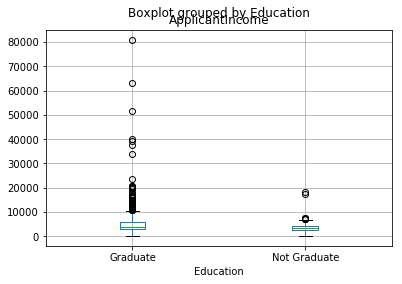

In [42]:
lp.boxplot(column='ApplicantIncome', by = 'Education')
plt.show()

In [43]:
print('There appears to be some graduates which have a higher income, they can be classified as outliers. Non-graduates have the same mean income and do not have any outliers.')

There appears to be some graduates which have a higher income, they can be classified as outliers. Non-graduates have the same mean income and do not have any outliers.


In [44]:
lp.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [45]:
print('There are missing values in few of the attributes. They should be filled to avoid any errors and model prediction.')

There are missing values in few of the attributes. They should be filled to avoid any errors and model prediction.


In [46]:
lp['LoanAmount'].fillna(lp['LoanAmount'].mean(), inplace=True)

lp['Self_Employed'].fillna('No',inplace=True)

In [47]:
print('We then remove the outliers by taking a log of the values to ground any adverse effect.')

We then remove the outliers by taking a log of the values to ground any adverse effect.


In [48]:
lp['LoanAmount_log'] = np.log(lp['LoanAmount'])

In [49]:
lp['Loan_Amount_Term'].fillna(lp['Loan_Amount_Term'].median(), inplace=True)
lp['Loan_Amount_Term_log'] = np.log(lp['Loan_Amount_Term'])

In [50]:
print('We can even fill the missing values using pivot tables.')

We can even fill the missing values using pivot tables.


In [51]:
table = lp.pivot_table(values='Credit_History',index='Self_Employed',columns='Education', aggfunc=np.median)

In [52]:
idx = lp.loc[lp['Credit_History'].isnull(), ['Self_Employed','Education', 'Credit_History']].index
lp = lp.set_index(['Education','Self_Employed'])
lp['Credit_History'].fillna(table.unstack(), inplace=True)
lp = lp.reset_index()
print (lp.loc[lp.index.isin(idx), ['Self_Employed','Education', 'Credit_History']])

    Self_Employed     Education  Credit_History
16             No  Not Graduate             1.0
24             No      Graduate             1.0
30             No      Graduate             1.0
42             No      Graduate             1.0
79            Yes  Not Graduate             1.0
83             No      Graduate             1.0
86             No  Not Graduate             1.0
95             No      Graduate             1.0
117            No      Graduate             1.0
125            No      Graduate             1.0
129            No      Graduate             1.0
130           Yes      Graduate             1.0
156            No      Graduate             1.0
181            No      Graduate             1.0
187            No      Graduate             1.0
198            No      Graduate             1.0
219            No      Graduate             1.0
236            No      Graduate             1.0
237           Yes      Graduate             1.0
259            No  Not Graduate         

In [54]:
print('Similarly we fill up the missing values in the attributes accordingly.')

Similarly we fill up the missing values in the attributes accordingly.


In [55]:
lp['Gender'].fillna('Male',inplace=True)
lp['Married'].fillna('Yes',inplace=True)
lp['Dependents'].fillna('0',inplace=True)

In [101]:
# We can make prediction models using sk library. Since it only accepts only numercial values, we convert all the categorical values to numerical for further processing.

from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    lp[i] = le.fit_transform(lp[i])
lp.dtypes 

Education                 int64
Self_Employed             int64
Loan_ID                  object
Gender                    int64
Married                   int64
Dependents                int64
ApplicantIncome           int64
CoapplicantIncome       float64
LoanAmount              float64
Loan_Amount_Term        float64
Credit_History          float64
Property_Area             int64
Loan_Status               int64
LoanAmount_log          float64
Loan_Amount_Term_log    float64
dtype: object

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [116]:
#First, we define a classidifciation model which provides with accuracy and cross-validation 
def classification_m(model, data, predictor, outcome):
    model.fit(data[predictor],data[outcome])
    
    prediction = model.predict(data[predictor])
    
    accuracy = metrics.accuracy_score(prediction,data[outcome])
    print('Accuracy : %s' % '{0:0.3%}'.format(accuracy))
        
        
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
    # Filter training data
        train_predictors = (data[predictor].iloc[train,:])
    
    # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
        error.append(model.score(data[predictor].iloc[test,:], data[outcome].iloc[test]))
 
    print ('Cross-Validation Score : %s' % '{0:0.3%}'.format(np.mean(error)))


In [117]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_m(model,lp,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [118]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Gender','Married','Education']
classification_m(model, lp,predictor_var,outcome_var)

Accuracy : 80.945%
Cross-Validation Score : 80.946%


In [119]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','ApplicantIncome']
classification_m(model, lp,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.666%


In [120]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

ApplicantIncome     0.251692
Credit_History      0.249328
LoanAmount_log      0.240866
Dependents          0.056149
Property_Area       0.055201
Loan_Amount_Term    0.048126
Married             0.030581
Education           0.026899
Gender              0.020719
Self_Employed       0.020439
dtype: float64


In [121]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['ApplicantIncome','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_m(model, lp,predictor_var,outcome_var)

Accuracy : 82.248%
Cross-Validation Score : 80.782%
